## 各トップカンファの年次accepted paper url

### ACL
- [2011](http://mirror.aclweb.org/acl2011/accepted_papers.shtml.html)
- [2012](http://mirror.aclweb.org/acl2012/program/sub00.asp.html)
- [2013](http://www.acl2013.org/site/accepted-papers.html)
- [2014](http://acl2014.org/Program.htm)
- [2015](http://acl2015.org/accepted_papers.html)
- [2016](http://mirror.aclweb.org/acl2016/indexa779.html?article_id=68)
- [2017](https://acl2017.wordpress.com/2017/04/05/accepted-papers-and-demonstrations/)
- [2018](http://acl2018.org/programme/papers/)

### EMNLP
- [2011](http://conferences.inf.ed.ac.uk/emnlp2011/papers.html)
- [2012](http://emnlp-conll2012.unige.ch/papers.html)
- [2013](http://mirror.aclweb.org/emnlp2013/papers.html)
- [2014](http://emnlp2014.org/papers.html)
- [2015](http://www.emnlp2015.org/accepted-papers.html)
- [2016](https://www.aclweb.org/mirror/emnlp2016/accepted-papers.html)
- [2017](http://emnlp2017.net/accepted-papers.html)
- 2018はまだ

### NAACL
- 2012 サイトアクセス拒否
- [2013](http://naacl2013.naacl.org/PapersAccepted.aspx)
- [2014]
- [2015](http://naacl.org/naacl-hlt-2015/papers.html)
- [2016](http://naacl.org/naacl-hlt-2016/accepted_papers.html)
- [2017]
- [2018](https://naacl2018.wordpress.com/2018/03/02/list-of-accepted-papers/)

In [1]:
# import nltk
# nltk.download()
# !mkdir texts images

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import text_preprocess

In [2]:
n_filter = 100
text_dir_path = './text'

In [3]:
def build_conf_dict(prefix, list_year):
    dic = {}
    for year in years:
        dic.update({year: {
                   'sentences': open(f'./{text_dir_path}/{prefix}_{year}.txt').read().replace('\n', ''),
                   'n_papers': len(list(filter(lambda x: x, map(lambda x: x.replace('\n', ''), 
                                                                open(f'./{text_dir_path}/{prefix}_{year}.txt').readlines()))))
        }})
        
    return dic

## ACL

In [4]:
prefix = 'acl'
years = list(range(2011, 2019))

In [5]:
acl = build_conf_dict(prefix, years)

In [6]:
acl_word_df = pd.DataFrame()

for year in acl.keys():
    common_by_year = pd.DataFrame(text_preprocess(acl[year]['sentences']).most_common(n_filter), columns = [f'{year}_w', f'{year}_r'])
    common_by_year[f'{year}_r'] = common_by_year[f'{year}_r'].apply(lambda x: round(x / acl[year]['n_papers'], 3))
    acl_word_df = pd.concat([acl_word_df, common_by_year], axis=1)

In [7]:
# for year in acl.keys():
#     wordcloud = WordCloud(max_font_size=40).generate(acl[year]['sentences'])
#     wordcloud.to_file(f'./images/acl_{year}_maxfont_40.png')

## 差分検出

In [8]:
dic ={}

In [9]:
# def fuga(dic1, dic2):
#     diff_dict = {}
#     for key1, value1 in dic1.items():
#         if key1 in dic2.keys():
#             diff_val = value1 - dic2[key1]
#             if diff_val > 0:
#                 diff_dict.update({key1: diff_val})
#         else:
#             diff_dict.update({key1: value1})
            
#     return diff_dict

# def hoge(df):
#     new_df = df.iloc[:, [-2, -1]]
#     old_df = df.iloc[:, [0, 1]]
    
#     new_values = {value[0]: value[1] for value in new_df.values}
#     old_values = {value[0]: value[1] for value in old_df.values}
#     diff_dict = {}
#     diff_dict.update(fuga(new_values, old_values))
#     diff_dict.update({key: -value for key, value in fuga(old_values, new_values).items()})
                
#     return diff_dict

In [10]:
# pd.DataFrame(sorted(hoge(acl_word_df).items(), key=lambda x: -x[1]), columns=['word', 'diff_rate'])

## EMNLP

In [11]:
prefix = 'emnlp'
years = list(range(2011, 2018))

In [12]:
emnlp = build_conf_dict(prefix, years)

In [13]:
emnlp_word_df = pd.DataFrame()

for year in emnlp.keys():
    common_by_year = pd.DataFrame(text_preprocess(emnlp[year]['sentences']).most_common(n_filter), columns = [f'{year}_w', f'{year}_r'])
    common_by_year[f'{year}_r'] = common_by_year[f'{year}_r'].apply(lambda x: round(x / emnlp[year]['n_papers'], 3))
    emnlp_word_df = pd.concat([emnlp_word_df, common_by_year], axis=1)

## NAACL

In [14]:
prefix = 'naacl'
years = [2013, 2015, 2016, 2018]

In [15]:
naacl = acl = build_conf_dict(prefix, years)

In [16]:
naacl_word_df = pd.DataFrame()

for year in naacl.keys():
    common_by_year = pd.DataFrame(text_preprocess(naacl[year]['sentences']).most_common(n_filter), columns = [f'{year}_w', f'{year}_r'])
    common_by_year[f'{year}_r'] = common_by_year[f'{year}_r'].apply(lambda x: round(x / naacl[year]['n_papers'], 3))
    naacl_word_df = pd.concat([naacl_word_df, common_by_year], axis=1)

In [17]:
import matplotlib.pyplot as plt

years_dict = {
    'acl': list(range(2011, 2019)),
    'emnlp': list(range(2011, 2018)),
    'naacl': [2013, 2015, 2016, 2018],
}

In [18]:
def _create_plot(df, word, prefix):
    word_rate_list = []
    years = years_dict[prefix]
    for year in years:
        word_rate = df[df[f'{year}_w'] == word][f'{year}_r'].reset_index(drop=True)
        if word_rate.shape[0] != 0:
            word_rate_list.append(word_rate[0])
        else:
            word_rate_list.append(0)
    return word_rate_list

def word_plot(word):
    acl_rate_list = _create_plot(acl_word_df, word, 'acl')
    emnlp_rate_list = _create_plot(emnlp_word_df, word, 'emnlp')
    naacl_rate_list = _create_plot(naacl_word_df, word, 'naacl')
    
    plt.plot(years_dict['acl'], acl_rate_list, label='acl')
    plt.plot(years_dict['emnlp'], emnlp_rate_list, label='emnlp')
    plt.plot(years_dict['naacl'], naacl_rate_list, label='naacl')
    plt.yticks(list(map(lambda x: x/50, range(11))))
    plt.xlabel('years')
    plt.ylabel('word rate')
    plt.legend()
    plt.title(f'{word}')
    plt.show()

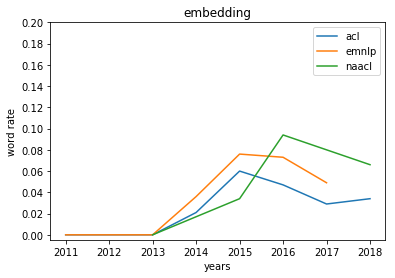

In [29]:
word_plot('embedding')

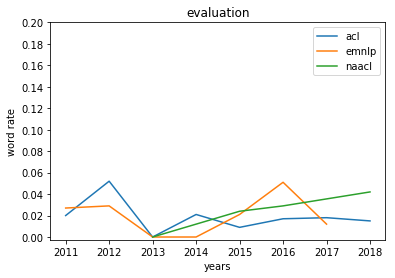

In [30]:
word_plot('evaluation')

In [20]:
tmp = pd.concat([acl_word_df.iloc[[0, 1]], emnlp_word_df.iloc[[0, 1]], naacl_word_df.iloc[[0, 1]]]).iloc[[0, 2, 4]]

In [21]:
tmp.index = ['acl', 'emnlp', 'naacl']

In [22]:
tmp = tmp[['2011_w', '2011_r', '2012_w', '2012_r', '2013_w', '2013_r', '2014_w', '2014_r', '2015_w', '2015_r', '2016_w', '2016_r', '2017_w', '2017_r', '2018_w', '2018_r']]

In [23]:
lst = [i*2+1 for i in range(len(years_dict['acl']))]

In [24]:
tmp.loc['acl'][lst]

2011_r    0.091
2012_r    0.095
2013_r    0.115
2014_r    0.088
2015_r    0.113
2016_r    0.106
2017_r    0.194
2018_r    0.176
Name: acl, dtype: object

In [25]:
tmp

,2011_w,2011_r,2012_w,2012_r,2013_w,2013_r,2014_w,2014_r,2015_w,2015_r,2016_w,2016_r,2017_w,2017_r,2018_w,2018_r
acl,translation,0.091,translation,0.095,machine,0.115,word,0.088,word,0.113,neural,0.106,neural,0.194,neural,0.176
emnlp,machine,0.094,language,0.072,machine,0.083,word,0.103,neural,0.106,neural,0.207,neural,0.169,NaN,NaN
naacl,NaN,NaN,NaN,NaN,translation,0.128,NaN,NaN,word,0.122,neural,0.199,NaN,NaN,neural,0.193


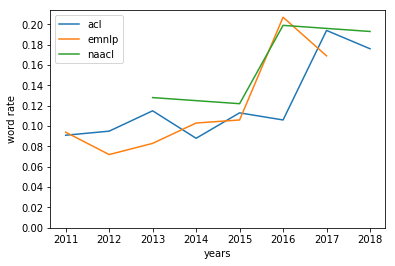

In [26]:
acl_lst = [i*2+1 for i in range(len(years_dict['acl']))]
emnlp_lst = [i*2+1 for i in range(len(years_dict['emnlp']))]
naacl_lst = [5, 9, 11, 15]

plt.plot(years_dict['acl'], tmp.loc['acl'][acl_lst].values , label='acl')
plt.plot(years_dict['emnlp'], tmp.loc['emnlp'][emnlp_lst].values, label='emnlp')
plt.plot(years_dict['naacl'], tmp.loc['naacl'][naacl_lst].values, label='naacl')
plt.yticks(list(map(lambda x: x/50, range(11))))
plt.xlabel('years')
plt.ylabel('word rate')
plt.legend()
# plt.title()
plt.show()

In [65]:
years_dict['naacl']

[2013, 2015, 2016, 2018]

In [64]:
tmp.loc['naacl'][naacl_lst].values

array([nan, nan, 0.128, nan], dtype=object)

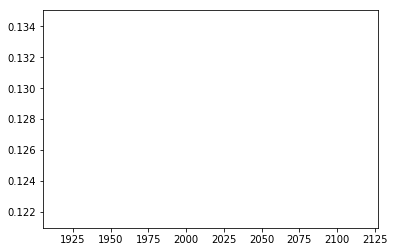

In [63]:
plt.plot(years_dict['naacl'], tmp.loc['naacl'][naacl_lst].values, label='naacl')
# plt.title(f'{word}')
plt.show()